# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (File -> Download as -> PDF via LaTeX). You should then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [20]:
import tensorflow as tf
from scipy.io import loadmat

![SVHN overview image](data/svhn_examples.jpg)
For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an  image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images. 

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [21]:
# Run this cell to load the dataset

train = loadmat('data/train_32x32.mat')
test = loadmat('data/test_32x32.mat')

In [22]:
train.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [23]:
test.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [24]:
import numpy as np

train_img = np.array(train['X'])
test_img = np.array(test['X'])

train_label = train['y']
test_label = test['y']

In [25]:
train_img = np.moveaxis(train_img, -1, 0)
test_img = np.moveaxis(test_img, -1, 0)

In [26]:
import matplotlib.pyplot as plt

In [27]:
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

/home/ikraminf/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


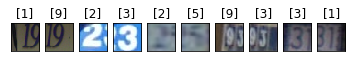

In [28]:
plot_images(train_img, train_label, 1, 10)

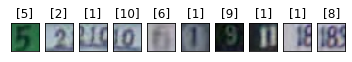

In [29]:
plot_images(test_img, test_label, 1, 10)

In [30]:
# to check unique labels
np.unique(train_label)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [31]:
train_label[train_label == 10] = 0
test_label[test_label == 10] = 0

In [32]:
def rgb2gray(images):
    return np.expand_dims(np.dot(images, [0.2990, 0.5870, 0.1140]), axis=3)

In [33]:
X_train = rgb2gray(train_img).astype(np.float32)
X_test = rgb2gray(test_img).astype(np.float32)

In [34]:
print("Training Set", X_train.shape)
print("Test Set", X_test.shape)

Training Set (73257, 32, 32, 1)
Test Set (26032, 32, 32, 1)


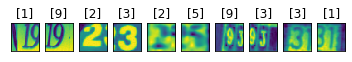

In [35]:
plot_images(X_train, train_label, 1, 10)

In [36]:
X_train = X_train/255.0
X_test = X_test/255.0

In [37]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)

In [38]:
print(y_train[0])

[0 1 0 0 0 0 0 0 0 0]


In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(73257, 32, 32, 1)
(73257, 10)
(26032, 32, 32, 1)
(26032, 10)


## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [41]:
def mlp_nn_classifier():
    
    model = Sequential([
                        Flatten(input_shape=(32, 32, 1)),
                        Dense(512, activation='relu'),
                        Dense(10, activation='softmax')
                    
    ])
    
    return model

In [42]:
model = mlp_nn_classifier()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 529,930
Trainable params: 529,930
Non-trainable params: 0
_________________________________________________________________


In [43]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

def get_checkpoint_every_epoch():
    
    checkpoint_path = 'model_checkpoint/checkpoint'
    checkpoint = ModelCheckpoint(filepath = checkpoint_path,
                            frequency='epoch',
                            save_weights_only=True,
                            verbose=1)
    return checkpoint

def get_early_stopping():
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)
    return early_stopping

In [44]:
 model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
checkpoint = get_checkpoint_every_epoch()
early_stopping = get_early_stopping()

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test),
                    callbacks=[checkpoint, early_stopping])

Train on 73257 samples, validate on 26032 samples
Epoch 1/30
73216/73257 [============================>.] - ETA: 0s - loss: 2.0566 - accuracy: 0.2600
Epoch 00001: saving model to model_checkpoint/checkpoint
73257/73257 [==============================] - 36s 489us/sample - loss: 2.0565 - accuracy: 0.2601 - val_loss: 1.8430 - val_accuracy: 0.3624
Epoch 2/30
73184/73257 [============================>.] - ETA: 0s - loss: 1.6166 - accuracy: 0.4544
Epoch 00002: saving model to model_checkpoint/checkpoint
73257/73257 [==============================] - 34s 458us/sample - loss: 1.6164 - accuracy: 0.4545 - val_loss: 1.6149 - val_accuracy: 0.4723
Epoch 3/30
73120/73257 [============================>.] - ETA: 0s - loss: 1.4406 - accuracy: 0.5269
Epoch 00003: saving model to model_checkpoint/checkpoint
73257/73257 [==============================] - 37s 510us/sample - loss: 1.4402 - accuracy: 0.5270 - val_loss: 1.5101 - val_accuracy: 0.5085
Epoch 4/30
73216/73257 [============================>.] - E

In [46]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

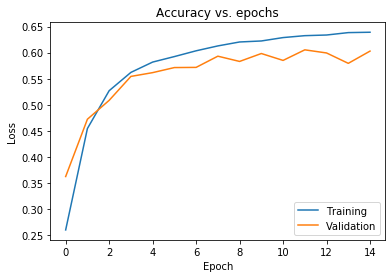

In [47]:
# Run this cell to plot the epoch vs accuracy graph

try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

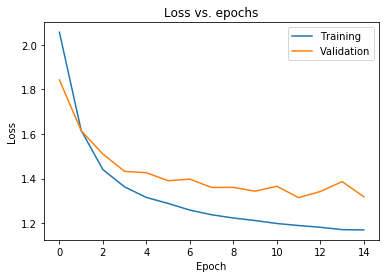

In [48]:
#Run this cell to plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [49]:
from tensorflow.keras.layers import BatchNormalization, Dropout, Conv2D, MaxPooling2D

In [50]:
def cnn_classifier():    
    
    model = Sequential([
                Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 1)),
                MaxPooling2D(2, 2),
                Dropout(0.5),
                BatchNormalization(),
                Conv2D(64, (3,3), activation='relu'),
                MaxPooling2D(2,2),
                Dropout(0.5),
                Flatten(),
                Dense(128, activation='relu'),
                Dense(10, activation='softmax')
        ])
    
    return model

In [51]:
cnn_model = cnn_classifier()
cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 30, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 15, 15, 64)        256       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 6, 6, 64)         

In [52]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
checkpoint_every_epoch = get_checkpoint_every_epoch()
early_stopping = get_early_stopping()

history = cnn_model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test),
                    callbacks=[checkpoint, early_stopping])

Train on 73257 samples, validate on 26032 samples
Epoch 1/3
73248/73257 [============================>.] - ETA: 0s - loss: 1.1513 - accuracy: 0.6230
Epoch 00001: saving model to model_checkpoint/checkpoint
73257/73257 [==============================] - 272s 4ms/sample - loss: 1.1512 - accuracy: 0.6231 - val_loss: 0.6238 - val_accuracy: 0.8264
Epoch 2/3
73248/73257 [============================>.] - ETA: 0s - loss: 0.6773 - accuracy: 0.7923
Epoch 00002: saving model to model_checkpoint/checkpoint
73257/73257 [==============================] - 283s 4ms/sample - loss: 0.6774 - accuracy: 0.7923 - val_loss: 0.5545 - val_accuracy: 0.8416
Epoch 3/3
73248/73257 [============================>.] - ETA: 0s - loss: 0.6055 - accuracy: 0.8132
Epoch 00003: saving model to model_checkpoint/checkpoint
73257/73257 [==============================] - 279s 4ms/sample - loss: 0.6055 - accuracy: 0.8132 - val_loss: 0.5495 - val_accuracy: 0.8446


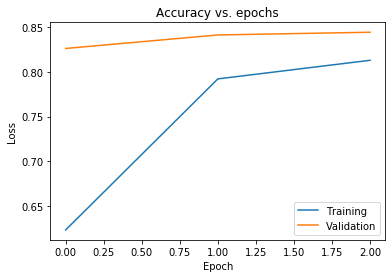

In [54]:
# Run this cell to plot the epoch vs accuracy graph

try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

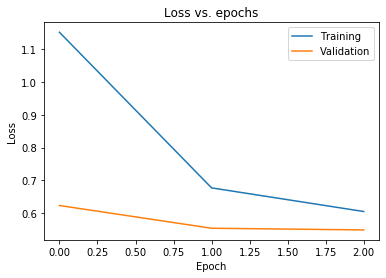

In [55]:
#Run this cell to plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [56]:
model = cnn_classifier()

In [57]:
model.load_weights('model_checkpoint/checkpoint')

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [59]:
# Get predictions and apply inverse transformation to the labels

y_pred = model.predict(X_train)

y_pred = lb.inverse_transform(y_pred, lb.classes_)
y_train = lb.inverse_transform(y_train, lb.classes_)

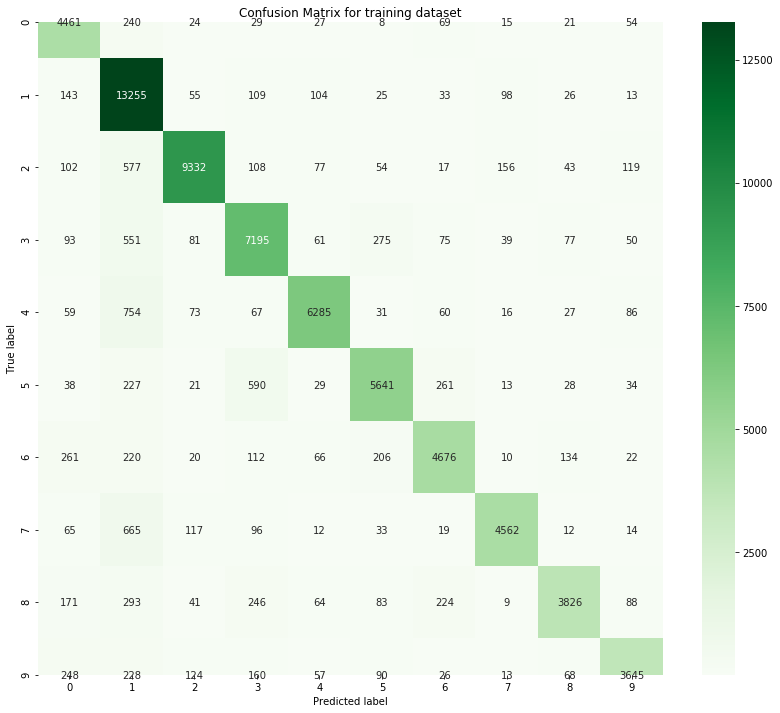

In [60]:
# Plot the confusion matrix

matrix = confusion_matrix(y_train, y_pred, labels=lb.classes_)

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='d', ax=ax)
plt.title('Confusion Matrix for training dataset')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [61]:
# Get predictions and apply inverse transformation to the labels

y_pred_prime = model.predict(X_test)

y_pred_prime = lb.inverse_transform(y_pred_prime, lb.classes_)
y_test = lb.inverse_transform(y_test, lb.classes_)

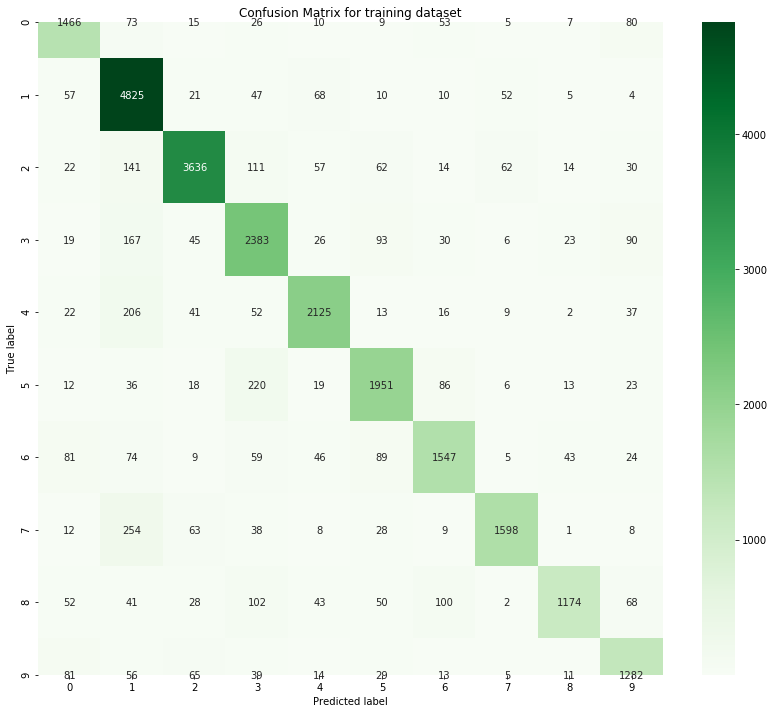

In [62]:
# Plot the confusion matrix

matrix = confusion_matrix(y_test, y_pred_prime, labels=lb.classes_)

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='d', ax=ax)
plt.title('Confusion Matrix for training dataset')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [63]:
import pandas as pd
y_pred = pd.DataFrame(y_pred)
y_pred_prime = pd.DataFrame(y_pred_prime)

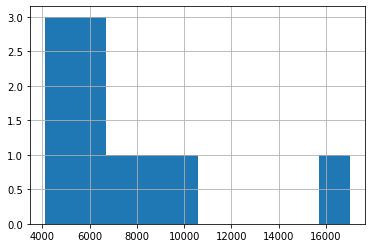

In [64]:
pd.value_counts(y_pred.values.flatten()).hist()

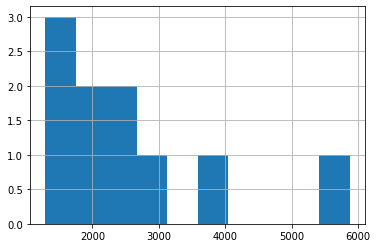

In [65]:
pd.value_counts(y_pred_prime.values.flatten()).hist()